# 𝙾𝚌𝚎𝚊𝚗𝚒𝚌 𝙽𝚒𝚗𝚘 𝙸𝚗𝚍𝚎𝚡 ( 𝙾𝙽𝙸 )

* ONI is a measure of the El Niño-Southern Oscillation, and other indices can confirm whether features consistent with a coupled ocean-atmosphere phenomenon accompanied these periods.

* 3 month running mean of ERSST.v5 SST anomalies in the Niño 3.4 region (5oN-5oS, 120o-170oW)]

* We read from this website: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams.update({'font.size': 22})

# read data

In [1]:
html = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php'
csv = '../../datasets/csv/ONI_data.csv'
# 1. Read all HTML tables from a given URL
ONI_table = pd.read_html(html, header=0, na_values="DJF", index_col=0)[8].dropna()# .head(50)

print(ONI_table.head())

# 2. Write first table, for example, to the CSV file
ONI_table.to_csv(csv)

NameError: name 'pd' is not defined

# each line is one year

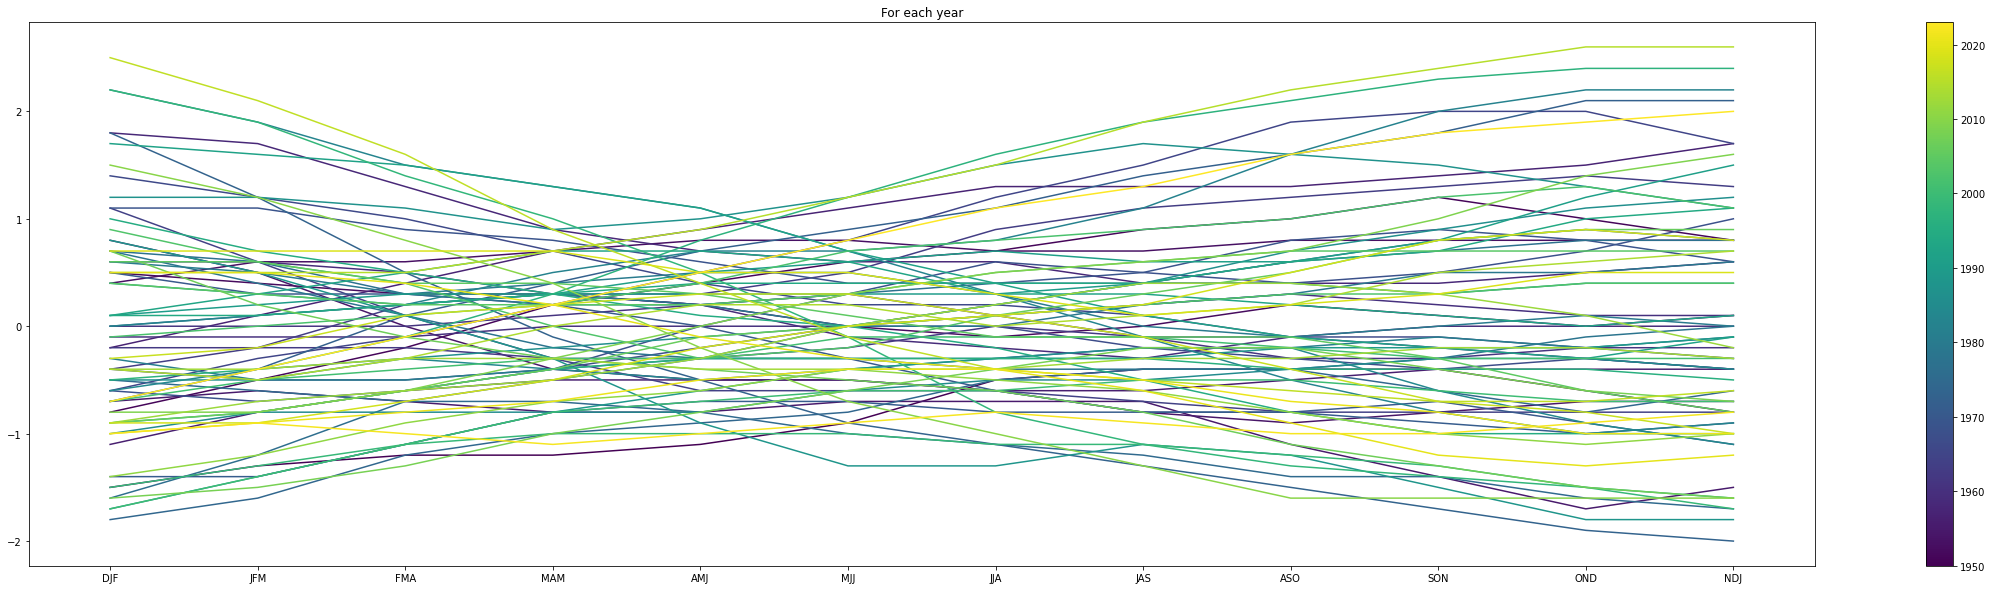

In [50]:
plt.figure(figsize=(40,10))
plt.title("For each year")

# Generate 12 equally spaced values between 0 and 1
values = np.linspace(0, 1, len(ONI_table))

# Create a colormap using these values
cmap = plt.cm.get_cmap('viridis')

# Get the corresponding colors from the colormap
colors = [cmap(value) for value in values]

# Define your mappable for colorbar creation
sm = plt.cm.ScalarMappable(cmap='viridis', 
                           norm=plt.Normalize(vmin=ONI_table.index.astype(int).min(),
                                              vmax=ONI_table.index.astype(int).max()))

# df.plot(legend=False, colormap='viridis', figsize=(12,7));


# Change the numeric ticks into ones that match the x-axis
#cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()) ) # .strftime(date_format='%Y'))


for i, (year, row) in enumerate(ONI_table.iterrows()):
    # print(row)
    plt.plot(row.astype('float'), color=colors[i])
    
    
#plt.axhline(y=0, color='k', linestyle='-')


cbar = plt.colorbar(sm);

#print("last row\n", row.astype('float'))

plt.savefig("example_annually_ONI.png")

# each line is a 3-months period

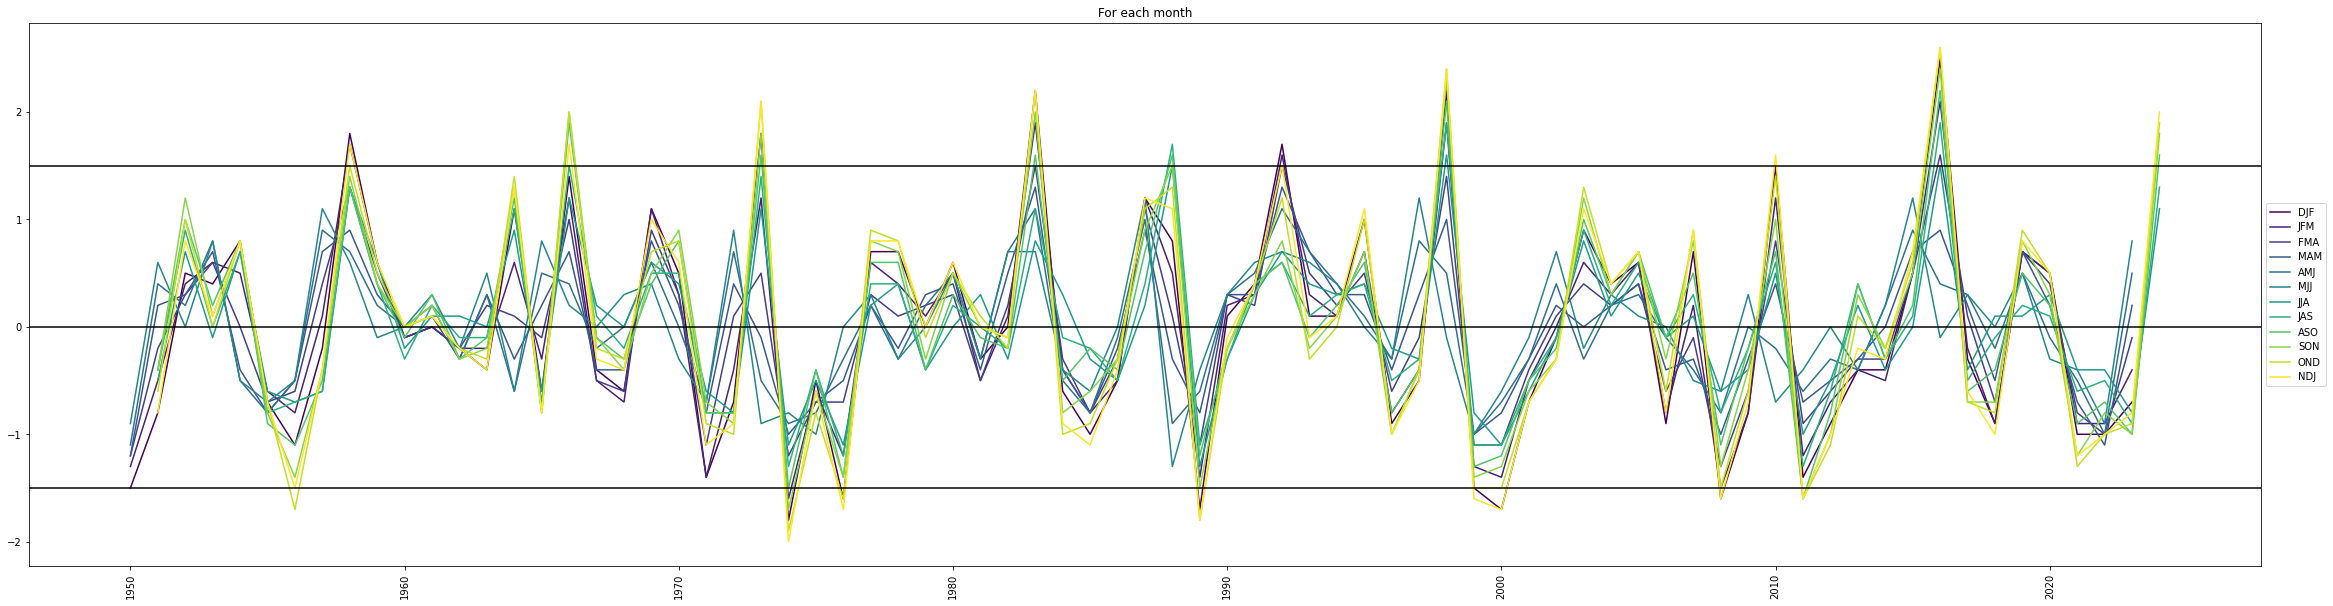

In [66]:
plt.figure(figsize=(40,10))
ax = plt.axes()
plt.title("For each month")

# Generate 12 equally spaced values between 0 and 1
values = np.linspace(0, 1, 12)

# Create a colormap using these values
cmap = plt.cm.get_cmap('viridis') # hsv')

# Get the corresponding colors from the colormap
colors = [cmap(value) for value in values]

for i_col, column in enumerate(ONI_table):
    # new year starts with May: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_change.shtml
    if i_col < 6 :
        tmp = ONI_table[column].astype('float')
        tmp.index = tmp.index.astype('int')
        
    else:
        #tmp = [1]
        tmp = ONI_table[column].astype('float')
        #print(tmp.index)
        tmp.index = tmp.index.astype('int') + 1
        
    
        
    line, = ax.plot(tmp, label=column, color=colors[i_col])
        

    
ax.axhline(y=0, color='k', linestyle='-')
ax.axhline(y=1.5, color='k', linestyle='-')
ax.axhline(y=-1.5, color='k', linestyle='-')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=90)

plt.savefig("example_monthly_ONI.png")

In [52]:
ONI_table.index.astype("int") + 1

Int64Index([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
            1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
           dtype='int64', name='Year')

In [45]:
ONI_table[column].index = ONI_table[column].index.astype('int') + 1

In [44]:
ONI_table[column].index

Float64Index([1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0,
              1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0,
              1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0,
              1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0,
              1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
              1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0,
              1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0,
              2023.0, 2024.0],
             dtype='float64', name='Year')

# mean, min, max, ... 

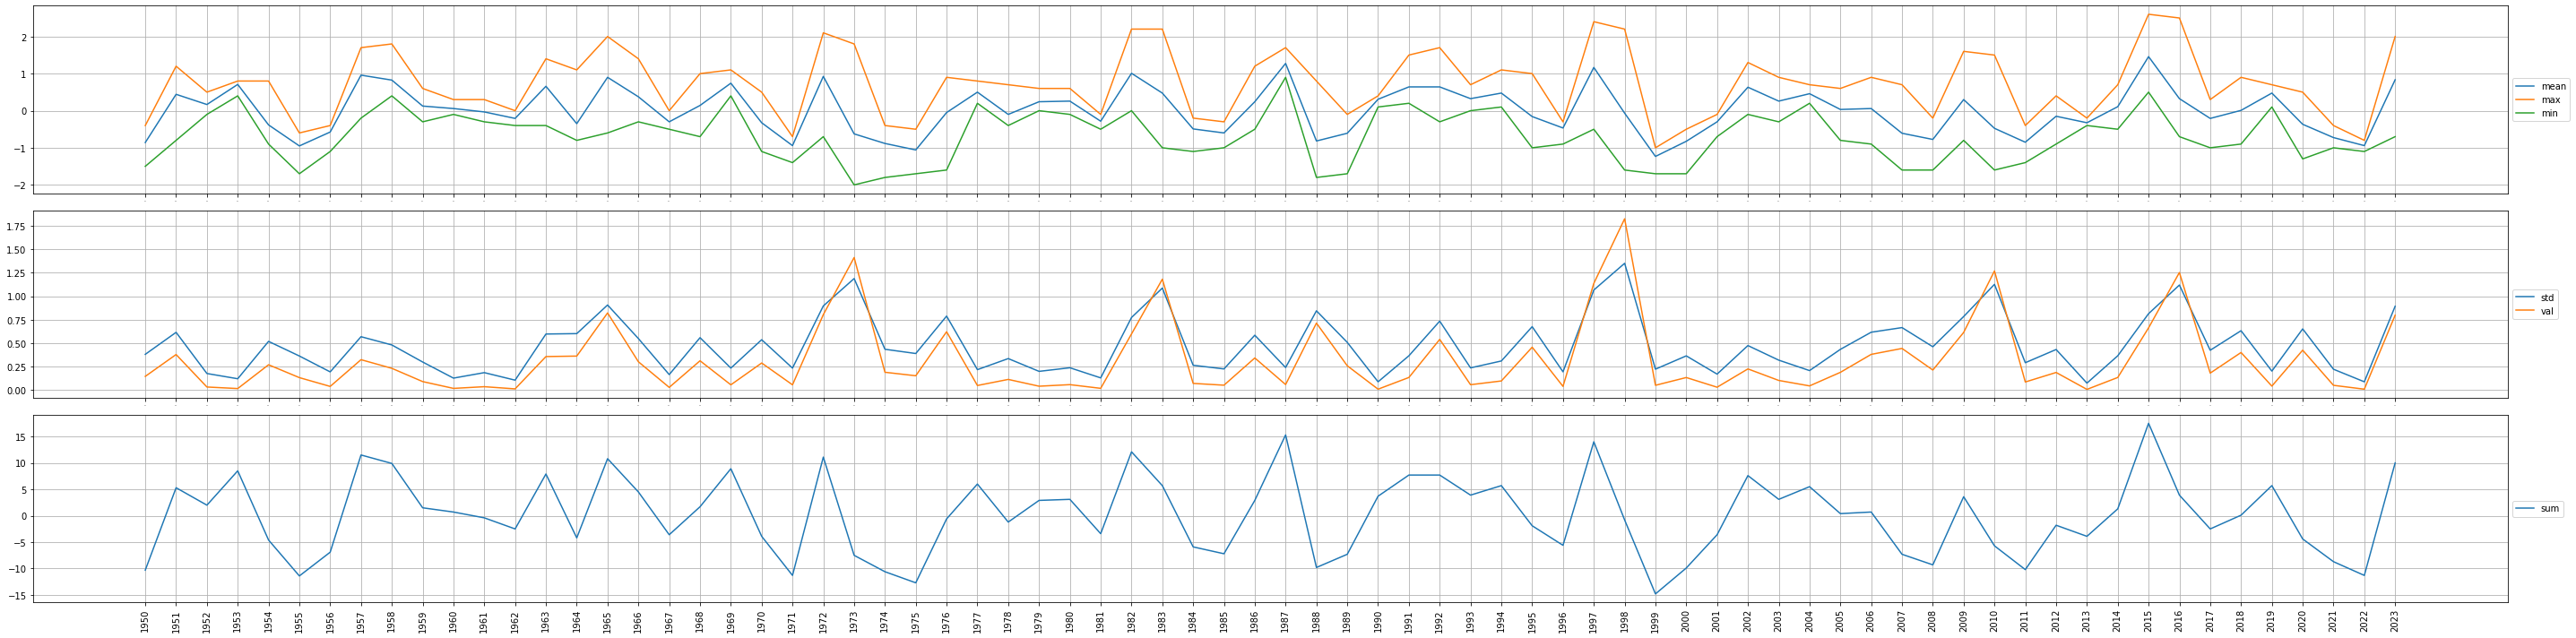

In [5]:
df_mean = []
df_max = []
df_min = []
df_year = []
df_sum = []
df_std = []
df_var = []

for year, value in ONI_table.iterrows():
    
    tmp = np.array(value).astype(float)
    
    #print(tmp.mean())
    
    # print(tmp.std())
    
    #tmp.mean()
    df_mean.append(tmp.mean())
    df_max.append(tmp.max())
    df_min.append(tmp.min())
    df_sum.append(tmp.sum())
    df_std.append(tmp.std())
    df_var.append(tmp.var())
    df_year.append(year)
    
    #print(np.array(value).astype(float).max())
    
# mean, max, min temperature (legend)

# df_year = [1950, 1999,2010,2024]

# plt.figure(figsize=(40,10))

fig, axs = plt.subplots(3, 1, figsize=(40,10))

axs[0].tick_params(axis="x", labelsize=0) 
axs[1].tick_params(axis="x", labelsize=0) 
axs[2].tick_params(axis="x", rotation=90) 

all_lists = [df_mean, df_max, df_min]


df = pd.DataFrame.from_dict({'mean': df_mean, 
                             'max': df_max, 
                             'min': df_min, 
                             'sum': df_sum, 
                             'std': df_std, 
                             'var': df_var} ) # , index=df_year)


axs[0].plot(df_year, df['mean'], label='mean')
axs[0].plot(df_year, df['max'], label='max')
axs[0].plot(df_year, df['min'], label='min')

axs[1].plot(df_year, df['std'], label='std')
axs[1].plot(df_year, df['var'], label='val')

axs[2].plot(df_year, df['sum'], label='sum')
#print(df)


if False:
    for col_key in df:
        #print(np.array(df[col_key]))
        axs[0].plot(df_year, df[col_key], label=col_key)

#axs[0].axhline(y=-1.5, color='k', linestyle='-')
#axs[0].axhline(y=0, color='k', linestyle='-')
#axs[0].axhline(y=1.5, color='k', linestyle='-')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].grid()
axs[1].grid()
axs[2].grid()

fig.tight_layout() 

plt.savefig("example_mean_min_max_ONI.png")

# Just testing color maps

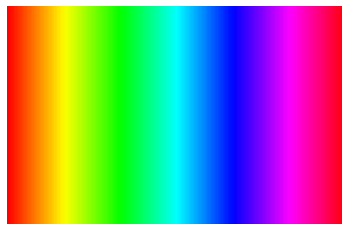

In [6]:

# Define custom colors for the circle
colors = ['blue', 'green', 'red', 'yellow', 'blue']

# Create a colormap with a smooth transition between the colors
cmap = 'hsv' #  matplotlib.colors.LinearSegmentedColormap.from_list('custom', colors, N=256)

# Plotting the colormap
plt.imshow(np.linspace(0, 1, 256).reshape(1, -1), aspect='auto', cmap=cmap)
plt.axis('off')
plt.show()